In [1]:
# simple reinformcent learning example
# 2d-dimensional maze

# accompanies blog writing up algorithmic art meetup on reinforcement learning
# https://www.meetup.com/Algorithmic-Art/events/261462857/

In [23]:
import numpy
import pandas
import random
import seaborn as sns

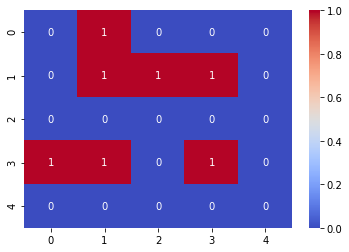

In [201]:
# maze

maze = numpy.array([
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]])

sns.heatmap(maze.T, cmap='coolwarm', annot=True)

In [202]:
# check we got coordinates correct

maze[0,3]

1

In [203]:
# Q-values table

Q = pandas.DataFrame(numpy.zeros((4,maze.size)))

Q

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
# run several iterations to iteratively estimate Q-values

# number of iterations (actions)
iterations = 10000

# initial position
xpos = 1
ypos = 4

for i in range(iterations):
    if (i % 1000 == 0):
        print("xpos, ypos = ",xpos, ypos)
        pass
    
    # consider all actions
    for action in [0, 1, 2, 3]:
        if (action == 0):
            xpos2 = xpos + 1
            ypos2 = ypos + 0
        if (action == 1):
            xpos2 = xpos + 0
            ypos2 = ypos + 1
        if (action == 2):
            xpos2 = xpos + -1
            ypos2 = ypos + 0
        if (action == 3):
            xpos2 = xpos + 0
            ypos2 = ypos + -1
        
        # if look ahead is outside maze, continue
        if ((xpos2 < 0) or (xpos2 > 4) or (ypos2 < 0) or (ypos2 > 4)):
            continue
        
        # reward is at position (0,4)
        reward = 0
        if (xpos2 == 0) and (ypos2 == 4):
            reward = 1
            pass
        
        # max Q from next state
        maxQ2 = max(Q[xpos2 + (5 * ypos2)])       
        
        # update Q-table
        Q.loc[action, xpos + (5 * ypos)] = reward + (0.9 * maxQ2)
        
        pass
    
    
    # set new position position according to random walk policy
    action = random.choice([0, 1, 2, 3])
    if (action == 0):
        xpos_new = xpos + 1
        ypos_new = ypos + 0
    if (action == 1):
        xpos_new = xpos + 0
        ypos_new = ypos + 1
    if (action == 2):
        xpos_new = xpos + -1
        ypos_new = ypos + 0
    if (action == 3):
        xpos_new = xpos + 0
        ypos_new = ypos + -1
    
    # check new position doesn't fall outside maze bounds
    xpos_new = numpy.clip(xpos_new, 0, 4)
    ypos_new = numpy.clip(ypos_new, 0, 4)
    
    # also check it doesn't hit barriers
    if (maze[xpos_new, ypos_new] == 1):
        xpos_new = xpos
        ypos_new = ypos
        pass
    
    # also check it doesn't hit goal
    if (xpos2 == 0) and (ypos2 == 4):
        xpos_new = xpos
        ypos_new = ypos
        pass
    
    # update position
    xpos = xpos_new
    ypos = ypos_new
    
    #print(Q)
    #print("")
    
    pass


xpos, ypos =  1 4
xpos, ypos =  0 2
xpos, ypos =  1 4
xpos, ypos =  2 0
xpos, ypos =  2 2
xpos, ypos =  4 0
xpos, ypos =  0 0
xpos, ypos =  0 4
xpos, ypos =  2 3
xpos, ypos =  1 2


In [219]:
# print state table

Q

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.0,2.039055,2.265617,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,4.736842,4.263158,3.836842,3.453158,0.000000
1,2.517352,0.0,0.000000,0.000000,2.517352,2.797058,0.0,0.0,0.0,2.797058,...,0.0,0.0,4.263158,0.0,3.453158,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,1.835150,2.039055,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.263158,4.736842,4.263158,3.836842
3,0.000000,0.0,0.000000,0.000000,0.000000,2.265617,0.0,0.0,0.0,2.265617,...,0.0,0.0,3.453158,0.0,2.797058,0.000000,0.000000,3.836842,0.000000,3.107842


In [220]:
# convert Q to map of V whic is just the max Q from a state

vmap = numpy.zeros_like(maze, dtype=float)

for i in range(vmap.shape[0]):
    for j in range(vmap.shape[1]):
        
        vmap[i, j] = Q[i + 5*j].max()
        
        pass
    pass

vmap

array([[2.51735211, 2.79705789, 3.10784211, 0.        , 4.73684211],
       [0.        , 0.        , 3.45315789, 0.        , 5.26315789],
       [2.03905521, 0.        , 3.83684211, 4.26315789, 4.73684211],
       [2.26561689, 0.        , 3.45315789, 0.        , 4.26315789],
       [2.51735211, 2.79705789, 3.10784211, 3.45315789, 3.83684211]])

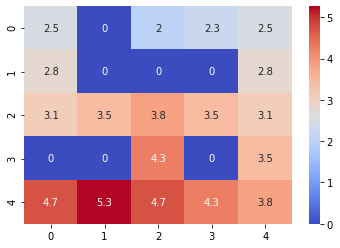

In [221]:
sns.heatmap(vmap.T, cmap='coolwarm', annot=True)